<a href="https://colab.research.google.com/github/haleywis/OPTI556/blob/main/HW2_Wiskoski_Part1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OPTI-556: Computational Imaging**  
# Haley Wiskoski  
Homework #2   
Due: Tuesday September 23rd, 2021

## Libraries

In [44]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.signal import convolve2d, convolve
from skimage.restoration import denoise_tv_chambolle
from skimage import color, data, restoration, exposure, filters
from skimage import io
from google.colab import files
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 16})

## 1) Image Debluring and Denoising


### A) Comparing Deblurring
Images reconstructed with three algorithms: Wiener, EM, and total variation. This portion will explore how well the reconstructions do for various blur levels, but a constant level of added noise. 

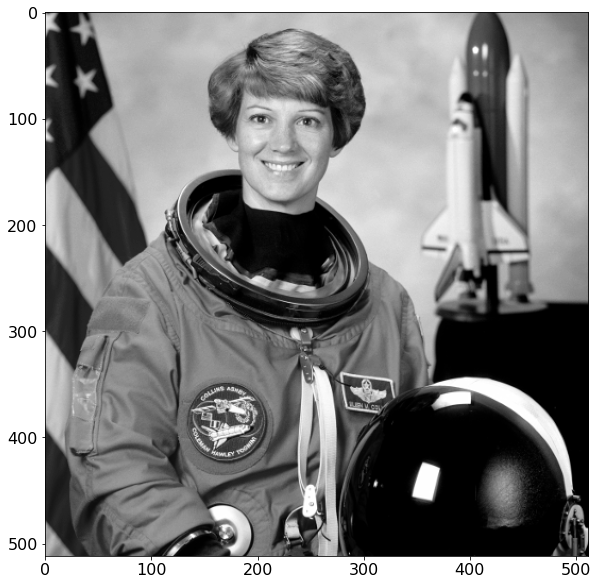

In [45]:
# uploading our image 
img = color.rgb2gray(data.astronaut())
# visually testing our output
plt.imshow(img) 

In [46]:
# First Gaussian PSF
snr = 10
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf = psf/np.sum(np.sum(psf))

# Get our measured object by convolving the PSF with our image
img_meas = convolve2d(img, psf, 'same')

# Adding Gaussian noise 
img_meas += img.std() * np.random.standard_normal(img.shape)/snr

# Obtaining the restored image using the Weiner filter
final = restoration.wiener(img_meas, psf, 1/snr)
EMfinal = restoration.richardson_lucy(img_meas, psf, iterations = 30)
TVfinal = denoise_tv_chambolle(img_meas, weight = 0.2)

#-------------------------------------------------------
# Using a second Gaussian PSF of different blur width
psf2 = np.exp(-(0.5*x**2+0.5*y**2))
psf2 = psf2/np.sum(np.sum(psf2))

img_meas2 = convolve2d(img, psf2, 'same')
img_meas2 += img.std() * np.random.standard_normal(img.shape)/snr
final2 = restoration.wiener(img_meas2, psf2, 1/snr)
EMfinal2 = restoration.richardson_lucy(img_meas2, psf2, iterations = 50)
TVfinal2 = denoise_tv_chambolle(img_meas2, weight = 0.2)

#-------------------------------------------------------
# Third Gaussian PSF of larger blur width
psf3 = np.exp(-(0.25*x**2+0.25*y**2))
psf3 = psf3/np.sum(np.sum(psf3))

img_meas3 = convolve2d(img, psf3, 'same')
img_meas3 += img.std() * np.random.standard_normal(img.shape)/snr
final3 = restoration.wiener(img_meas3, psf3, 1/snr)
EMfinal3 = restoration.richardson_lucy(img_meas3, psf3, iterations = 70)
TVfinal3 = denoise_tv_chambolle(img_meas3, weight = 0.2)

#### a) Wiener

MSE of first Wiener reconstruction: 0.008859870577769192
MSE of second Wiener reconstruction: 0.013815011664670931
MSE of third Wiener reconstruction: 0.025228829538407403


Text(0.5, 1.0, 'Wiener Filtered Image 3')

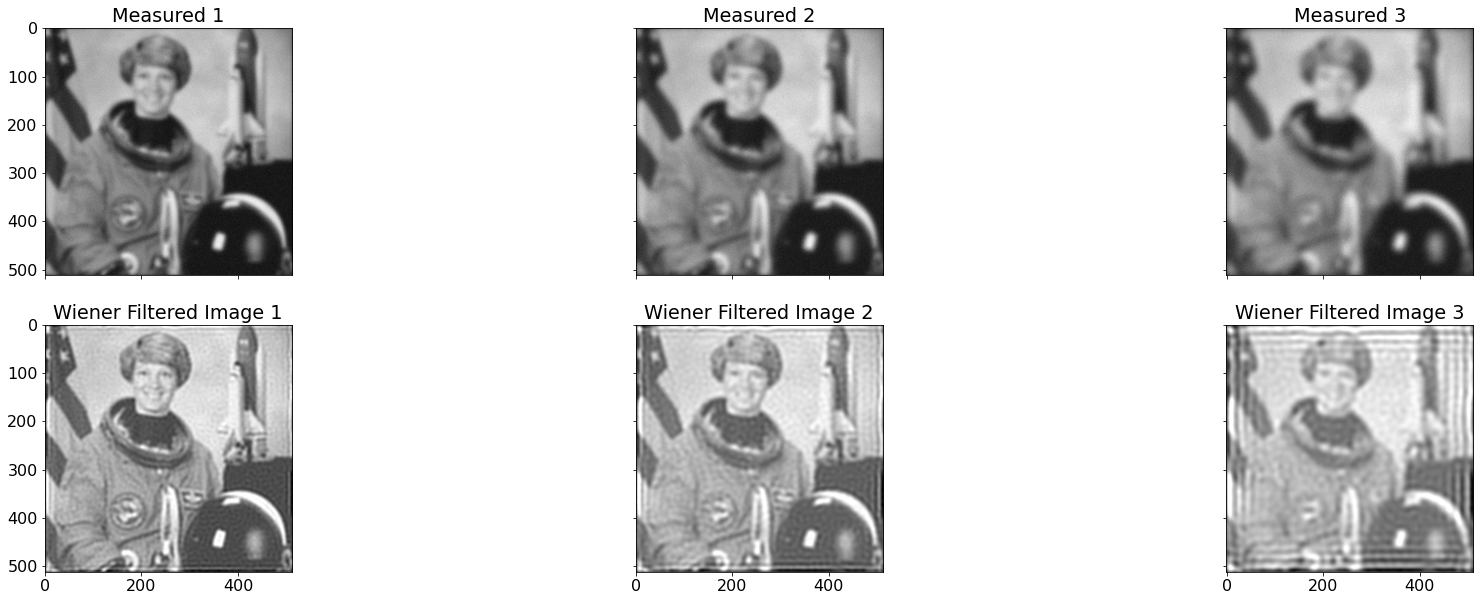

In [47]:
# Results from Wiener Reconstruction

# Calculating Mean Square Error between the original and reconstructed images
Y1 = np.square(np.subtract(img,final)).mean()
print("MSE of first Wiener reconstruction:", Y1)
Y2 = np.square(np.subtract(img,final2)).mean()
print("MSE of second Wiener reconstruction:", Y2)
Y3 = np.square(np.subtract(img,final3)).mean()
print("MSE of third Wiener reconstruction:", Y3)

#-------------------------------------------------------
# Plotting results from Wiener Reconstruction
# Plotting results from EM Reconstruction
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()

ax[0,0].imshow(img_meas)
ax[0,0].set_title('Measured 1')
ax[0,1].imshow(img_meas2)
ax[0,1].set_title('Measured 2')
ax[0,2].imshow(img_meas3)
ax[0,2].set_title('Measured 3')
ax[1,0].imshow(final)
ax[1,0].set_title('Wiener Filtered Image 1')
ax[1,1].imshow(final2)
ax[1,1].set_title('Wiener Filtered Image 2')
ax[1,2].imshow(final3)
ax[1,2].set_title('Wiener Filtered Image 3')

#### b) Expectation Maximization

MSE of first EM reconstruction: 0.026475374051557105
MSE of second EM reconstruction: 0.039529343981220946
MSE of third EM reconstruction: 0.07337563502914149


Text(0.5, 1.0, 'EM Filtered Image 3')

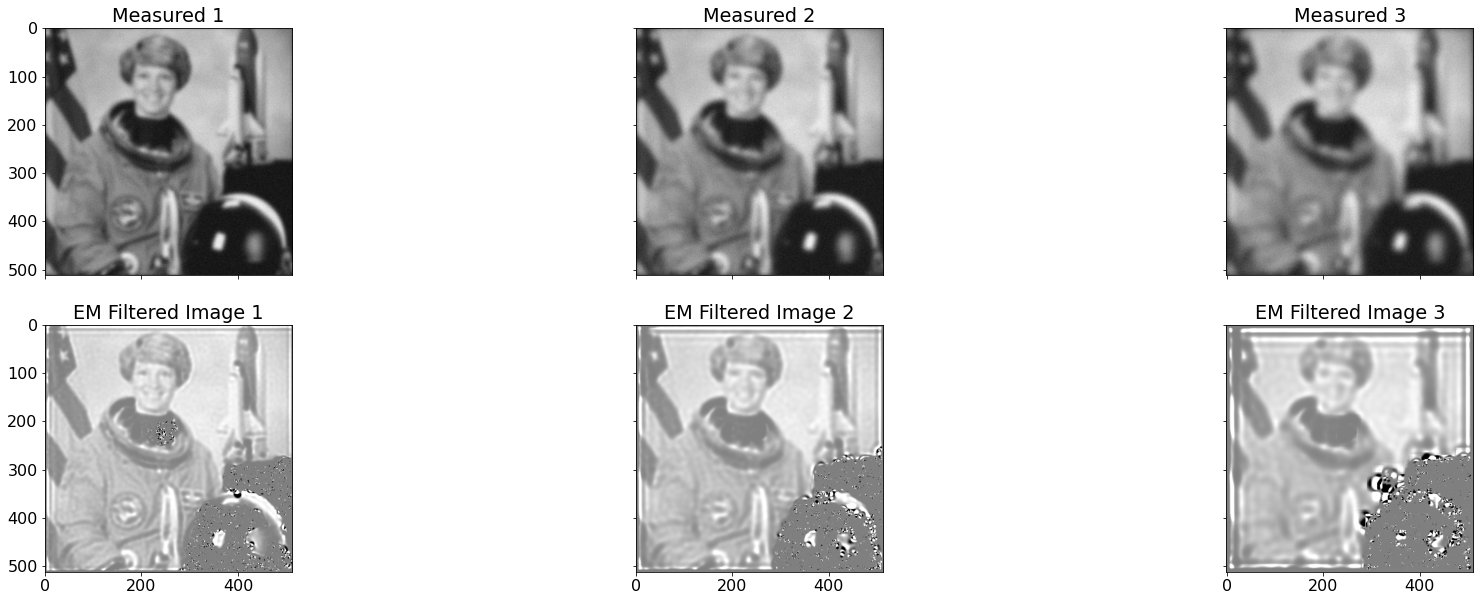

In [48]:
# Results of Expectation Maximization reconstruction

# Calculating Mean Square Error between the original and reconstructed images
Y1 = np.square(np.subtract(img,EMfinal)).mean()
print("MSE of first EM reconstruction:", Y1)
Y2 = np.square(np.subtract(img,EMfinal2)).mean()
print("MSE of second EM reconstruction:", Y2)
Y3 = np.square(np.subtract(img,EMfinal3)).mean()
print("MSE of third EM reconstruction:", Y3)

#-------------------------------------------------------
# Plotting results from EM Reconstruction
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()

ax[0,0].imshow(img_meas)
ax[0,0].set_title('Measured 1')
ax[0,1].imshow(img_meas2)
ax[0,1].set_title('Measured 2')
ax[0,2].imshow(img_meas3)
ax[0,2].set_title('Measured 3')
ax[1,0].imshow(EMfinal)
ax[1,0].set_title('EM Filtered Image 1')
ax[1,1].imshow(EMfinal2)
ax[1,1].set_title('EM Filtered Image 2')
ax[1,2].imshow(EMfinal3)
ax[1,2].set_title('EM Filtered Image 3')

#### c) Total Variation

MSE of first TV Restoration: 0.008995519939903976
MSE of second TV Restoration: 0.01201300058789475
MSE of third TV Restoration: 0.015542170914551328


Text(0.5, 1.0, 'TV Filtered Image 3')

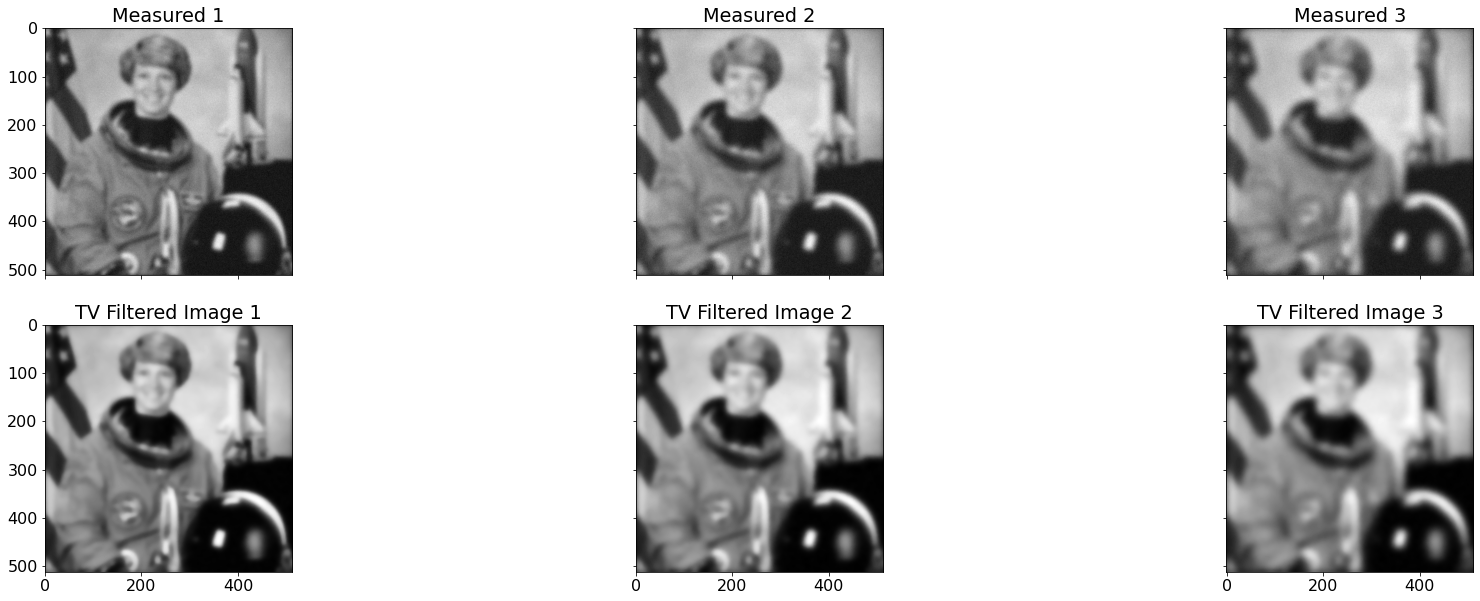

In [49]:
# Results from Total Variation Restoration 

# Calculating Mean Square Error between the original and reconstructed images
Y1 = np.square(np.subtract(img,TVfinal)).mean()
print("MSE of first TV Restoration:", Y1)
Y2 = np.square(np.subtract(img,TVfinal2)).mean()
print("MSE of second TV Restoration:", Y2)
Y3 = np.square(np.subtract(img,TVfinal3)).mean()
print("MSE of third TV Restoration:", Y3)

#-------------------------------------------------------
# Plotting results from TV Reconstruction
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
ax[0,0].imshow(img_meas)
ax[0,0].set_title('Measured 1')
ax[0,1].imshow(img_meas2)
ax[0,1].set_title('Measured 2')
ax[0,2].imshow(img_meas3)
ax[0,2].set_title('Measured 3')
ax[1,0].imshow(TVfinal)
ax[1,0].set_title('TV Filtered Image 1')
ax[1,1].imshow(TVfinal2)
ax[1,1].set_title('TV Filtered Image 2')
ax[1,2].imshow(TVfinal3)
ax[1,2].set_title('TV Filtered Image 3')

Text(0.5, 1.0, 'Gaussian PSF 3')

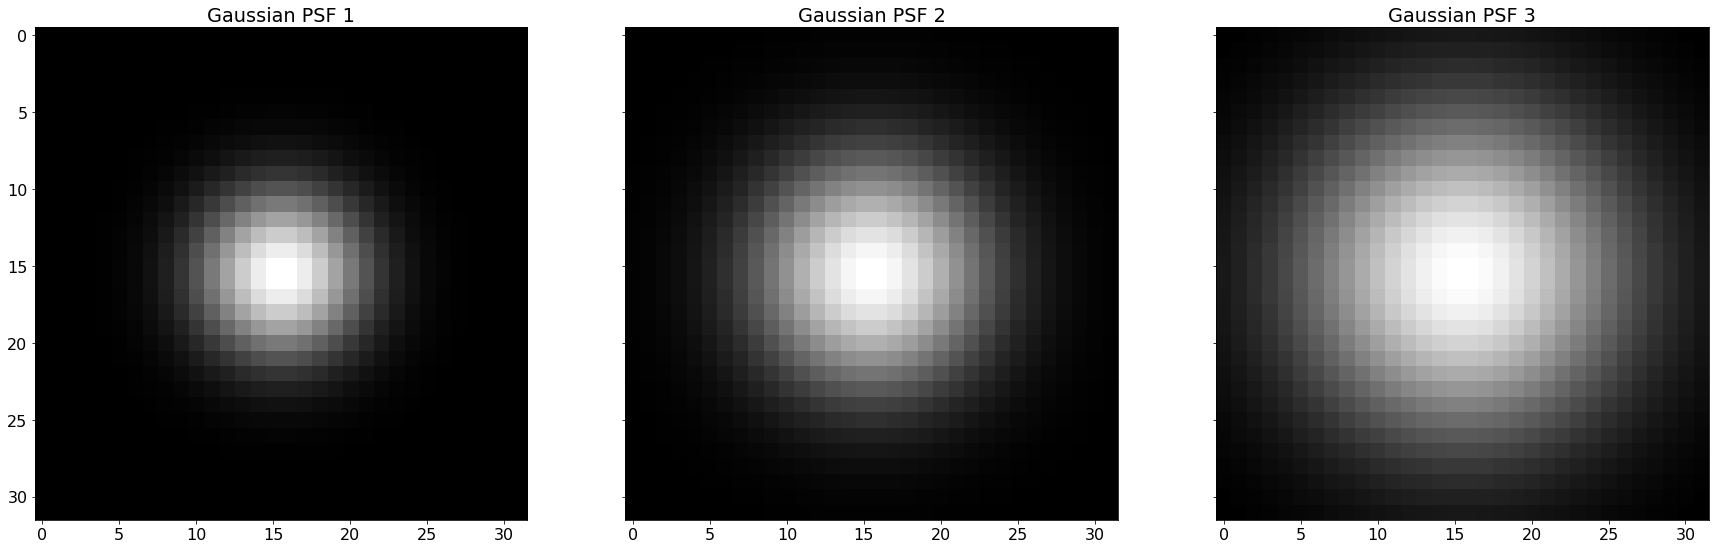

In [50]:
# Here are the three PSFs used above
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
ax[0].imshow(psf)
ax[0].set_title('Gaussian PSF 1')
ax[1].imshow(psf2)
ax[1].set_title('Gaussian PSF 2')
ax[2].imshow(psf3)
ax[2].set_title('Gaussian PSF 3')

### B) Comparing Denoising
In this portion we will apply various levels of Poisson noise to the image and compare the restoration abilities of each algorithm. The same Gaussian blurring PSF will be applied to each image to create the "measured" data.

In [51]:
# Same process as above, but using Poisson noise instead of Gaussian

# Poisson noise with signal level = 100
signal = 100
snr = signal / np.sqrt(signal)
img_meas = convolve2d(img, psf, 'same')
noise_mask= img_meas.std() * np.random.poisson(1, img.shape)/snr
img_noisy = img_meas + noise_mask
final = restoration.wiener(img_noisy, psf, 1/snr)
EMfinal = restoration.richardson_lucy(img_noisy, psf, iterations = 30)
TVfinal = denoise_tv_chambolle(img_noisy, weight = 0.2)

# Poisson noise with signal level = 1000
signal = 1000
snr = signal / np.sqrt(signal)
img_meas = convolve2d(img, psf, 'same')
noise_mask= img_meas.std() * np.random.poisson(1, img.shape)/snr
img_noisy2 = img_meas + noise_mask
final2 = restoration.wiener(img_noisy2, psf, 1/snr)
EMfinal2 = restoration.richardson_lucy(img_noisy2, psf, iterations = 30)
TVfinal2 = denoise_tv_chambolle(img_noisy2, weight = 0.2)

# Poisson noise with signal level = 10000
signal = 10000
snr = signal / np.sqrt(signal)
img_meas = convolve2d(img, psf, 'same')
noise_mask= img_meas.std() * np.random.poisson(1, img.shape)/snr
img_noisy3 = img_meas + noise_mask
final3 = restoration.wiener(img_noisy3, psf, 1/snr)
EMfinal3 = restoration.richardson_lucy(img_noisy3, psf, iterations = 30)
TVfinal3 = denoise_tv_chambolle(img_noisy3, weight = 0.2)

#-------------------------------------------------------


#### a) Wiener

MSE of first Wiener reconstruction (lower SNR): 0.009208654080104576
MSE of second Wiener reconstruction (higher SNR): 0.009725612969035367
MSE of third Wiener reconstruction (highest SNR): 0.011952346634593138


Text(0.5, 1.0, 'Wiener Filtered Image 3')

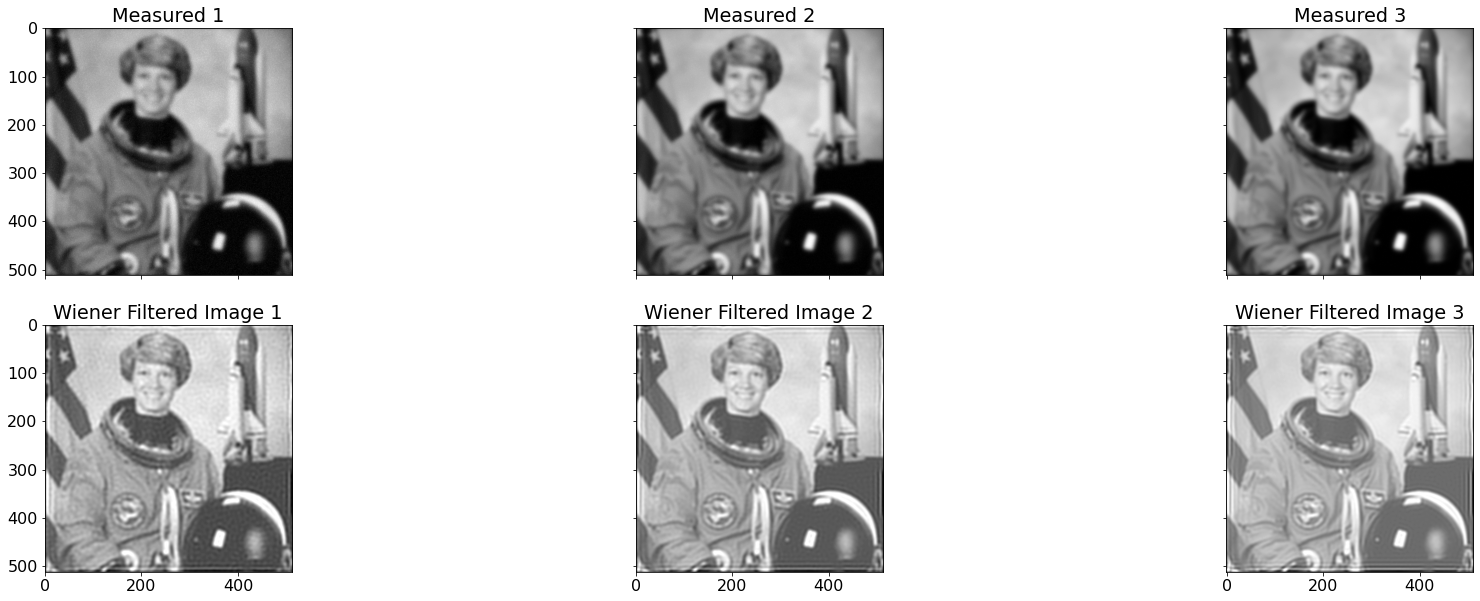

In [52]:
# Results of Wiener Reconstruction 

# Calculating Mean Square Error between the original and reconstructed images
Y1 = np.square(np.subtract(img,final)).mean()
print("MSE of first Wiener reconstruction (lower SNR):", Y1)
Y2 = np.square(np.subtract(img,final2)).mean()
print("MSE of second Wiener reconstruction (higher SNR):", Y2)
Y3 = np.square(np.subtract(img,final3)).mean()
print("MSE of third Wiener reconstruction (highest SNR):", Y3)

#-------------------------------------------------------
# Plotting results
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
ax[0,0].imshow(img_noisy)
ax[0,0].set_title('Measured 1')
ax[0,1].imshow(img_noisy2)
ax[0,1].set_title('Measured 2')
ax[0,2].imshow(img_noisy3)
ax[0,2].set_title('Measured 3')
ax[1,0].imshow(final)
ax[1,0].set_title('Wiener Filtered Image 1')
ax[1,1].imshow(final2)
ax[1,1].set_title('Wiener Filtered Image 2')
ax[1,2].imshow(final3)
ax[1,2].set_title('Wiener Filtered Image 3')

#### b) Expectation Maximization



MSE of first EM reconstruction: 0.013231098597506857
MSE of second EM reconstruction: 0.01238766220709011
MSE of third EM reconstruction: 0.012280982169152794


Text(0.5, 1.0, 'EM Filtered Image 3')

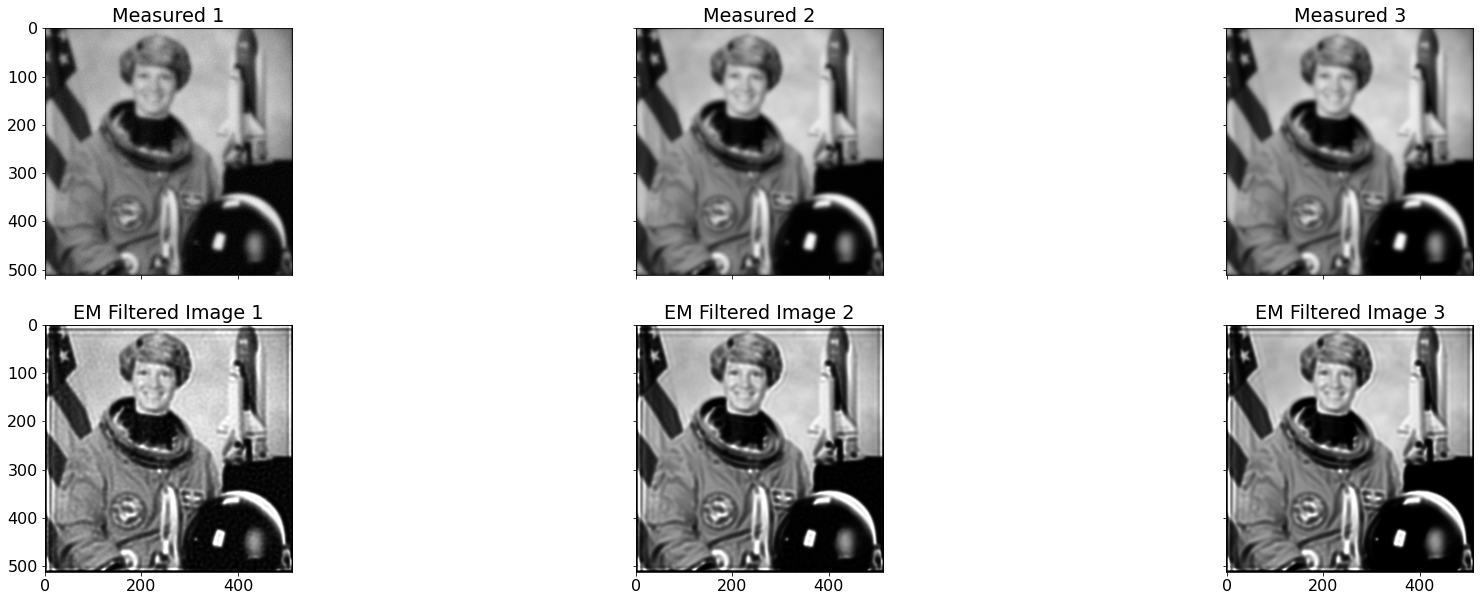

In [53]:
# Results of Expectation Maximization reconstruction

# Calculating Mean Square Error between the original and reconstructed images
Y1 = np.square(np.subtract(img,EMfinal)).mean()
print("MSE of first EM reconstruction:", Y1)
Y2 = np.square(np.subtract(img,EMfinal2)).mean()
print("MSE of second EM reconstruction:", Y2)
Y3 = np.square(np.subtract(img,EMfinal3)).mean()
print("MSE of third EM reconstruction:", Y3)

#-------------------------------------------------------
# Plotting results from EM Reconstruction
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
ax[0,0].imshow(img_noisy)
ax[0,0].set_title('Measured 1')
ax[0,1].imshow(img_noisy2)
ax[0,1].set_title('Measured 2')
ax[0,2].imshow(img_noisy3)
ax[0,2].set_title('Measured 3')
ax[1,0].imshow(EMfinal)
ax[1,0].set_title('EM Filtered Image 1')
ax[1,1].imshow(EMfinal2)
ax[1,1].set_title('EM Filtered Image 2')
ax[1,2].imshow(EMfinal3)
ax[1,2].set_title('EM Filtered Image 3')

#### c) Total Variation

MSE of first TV Restoration: 0.00948004045982105
MSE of second TV Restoration: 0.009021580576285548
MSE of third TV Restoration: 0.00894361698897495


Text(0.5, 1.0, 'TV Filtered Image 3')

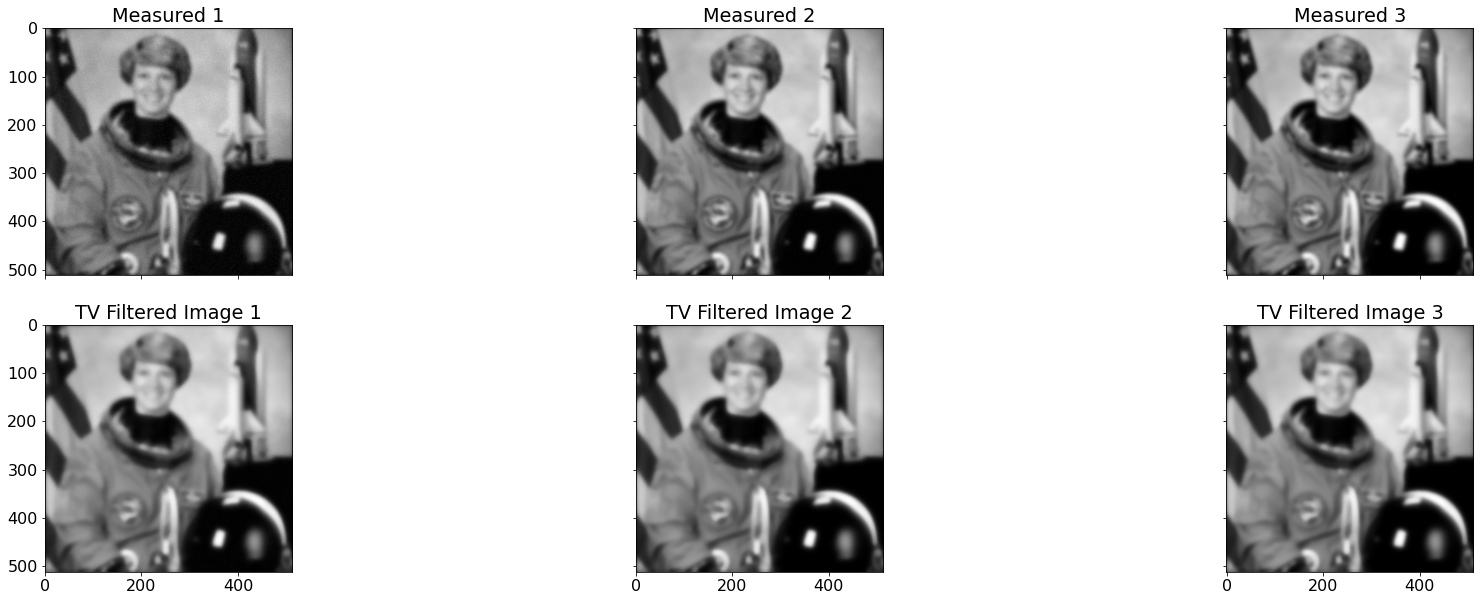

In [54]:
# Results from Total Variation Restoration 

# Calculating Mean Square Error between the original and reconstructed images
Y1 = np.square(np.subtract(img,TVfinal)).mean()
print("MSE of first TV Restoration:", Y1)
Y2 = np.square(np.subtract(img,TVfinal2)).mean()
print("MSE of second TV Restoration:", Y2)
Y3 = np.square(np.subtract(img,TVfinal3)).mean()
print("MSE of third TV Restoration:", Y3)

#-------------------------------------------------------
# Plotting results from TV Reconstruction
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
ax[0,0].imshow(img_noisy)
ax[0,0].set_title('Measured 1')
ax[0,1].imshow(img_noisy2)
ax[0,1].set_title('Measured 2')
ax[0,2].imshow(img_noisy3)
ax[0,2].set_title('Measured 3')
ax[1,0].imshow(TVfinal)
ax[1,0].set_title('TV Filtered Image 1')
ax[1,1].imshow(TVfinal2)
ax[1,1].set_title('TV Filtered Image 2')
ax[1,2].imshow(TVfinal3)
ax[1,2].set_title('TV Filtered Image 3')

### C) Discussion

There are two main points being explored here in this portion of the assignment. First, we compared the ability of the four algorithms when presented with various levels of blur. Secondly, we compared these algorithms when presented with a constant blur, but various levels of added Poisson noise. There are several takeaways from each of these two explorations. 

In the deblurring exercise, we compare the Wiener, Expectation Maximization, and Total Variation algorithms. The Mean Square Error of each of these was calculated between each respective input and output. The Wiener filter not only appears to perform better visually, but the overal MSE for the three levels of blur is greater than the MSE from the other two algorithms. One interesting thing to point out is that we can see some residual effects in the ouput images, resembling a sort of "bubbly" pattern. These "bubbles" increase in size as the width of the psf increases. The output images maintain a respectable level of clarity and definition (especially in the first and second blur levels). Ringing effect increase aroundt ehedges of the output images with increased blur size. Overall, the ouput images appear to have more detail than the "measured" images, aside from the ringing and "bubble" artifacts. Expectation Maximization performs in a similar manner, with increased ringing and "bubble" effect with increased blur spot. Visually, the output images are slightly less clear than those output by the Wiener filter. One major downfall of this filter is the major artifact present in the lower righthand corner of the output images. This occurs where the helmet is in the original image. This effect increases in severity to the point where the helmet is almost unrecognizable. For this reason, the average MSE is slightly higher than that from the Wiener algorithm. Finally, the total variation algorithm performed the worst in terms of visual examination of the output. What's interesting on the other hand is that the MSE is comparable to that of the Wiener filter, and is even slightly better in the two higher blur filters. The TV algorithm is more geared toward dealing with noise so it also makes sense that there is visually less noise in the ouput images than those from the other two filters, but the level of blur in the image isn't dealt with (maybe even worsened). The ouputs lack detail and definition, which intrigues me how the MSE is so low. 


The denoising exercise resulted in more favorable outputs. The Wiener filter produced very visually appealing images with a high level of clarity, definition, and detail. The level of noise (visually) appears to drop off even though we are increasing the amount of noise being introduced. The amount of ringing is significantly less in this case, as well. The Wiener filter appears to handle denoising well, as the highest level of noise introduced to the system resulted in an almost clearer image than the two lower levels of noise. This is in constrast with the increasing MSE value for each, though, which is interesting. Expectation maximization performed better here, as well. The major artifact around the helmet in the output image is now gone. The level of ringing around the ouput image is also lessened. Again, it appears that a higher level of adde noise produced a better output image visually. This is also demonstrated in the MSE values, as the MSE decreases with increasing noise level. Finally, we have the TV algorithm. Again, this algorithm did not produce very visually appealing images as it did not take care of the blur. But in contrast, the MSE decreases for increasing levels of noise. 

## 2) Regression Algorithms

### A) Installation of Chianti Database

In [55]:
!wget https://download.chiantidatabase.org/CHIANTI_10.0.1_database.tar.gz
!mkdir dbase
!tar xvf CHIANTI_10.0.1_database.tar.gz -C dbase/

--2021-09-28 22:49:15--  https://download.chiantidatabase.org/CHIANTI_10.0.1_database.tar.gz
Resolving download.chiantidatabase.org (download.chiantidatabase.org)... 70.32.23.63
Connecting to download.chiantidatabase.org (download.chiantidatabase.org)|70.32.23.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888202017 (847M) [application/x-gzip]
Saving to: ‘CHIANTI_10.0.1_database.tar.gz.1’

CHIANTI_10.0.1_data 100%[===================>] 847.05M  44.5MB/s    in 19s     

2021-09-28 22:49:34 (43.9 MB/s) - ‘CHIANTI_10.0.1_database.tar.gz.1’ saved [888202017/888202017]

mkdir: cannot create directory ‘dbase’: File exists
README_CHIANTI
VERSION
abundance/
abundance/sun_coronal_2012_schmelz_ext.abund
abundance/cosmic_1973_allen.abund
abundance/sun_photospheric_2011_caffau.abund
abundance/sun_photospheric_2015_scott.abund
abundance/unity.abund
abundance/sun_coronal_1999_fludra_ext.abund
abundance/sun_photospheric_1998_grevesse.abund
abundance/sun_coronal_1992_feld

In [56]:
!pip3 install ChiantiPy
!pip3 install ipyparallel
%env XUVTOP=/content/dbase/
import ChiantiPy.core as ch

env: XUVTOP=/content/dbase/


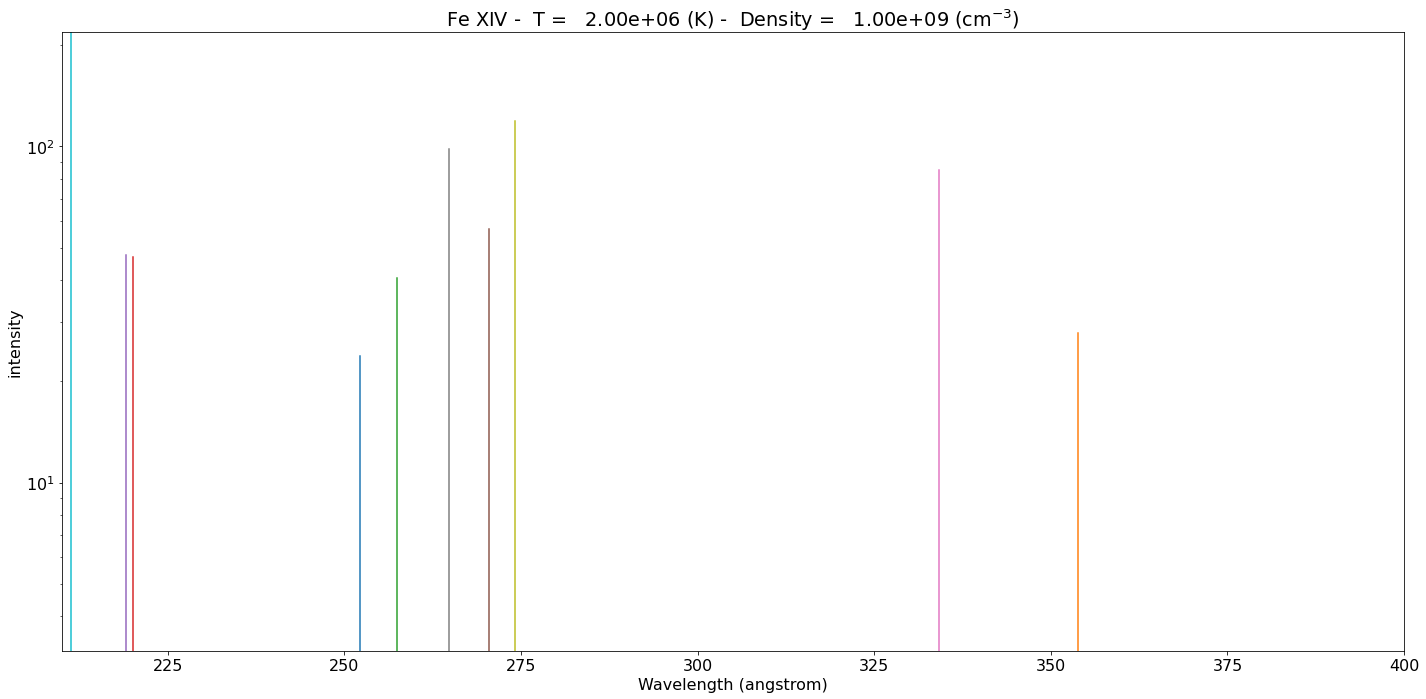

In [57]:
t=2000000
fe14 = ch.ion('fe_14', temperature=t, eDensity=1.e+9, em=1.e+27)
fe14.intensityPlot(wvlRange=[210.,400.],linLog='log')
wvl = np.linspace(100,400,1024)
fe14.spectrum(wvl)

### B) Random Measurement Matrix
In this exercise, we will apply a random full rank H matrix to a spectra from the Chianti database. Various levels of noise will be added, and we will observe the ability of several regression algorithms to recover the original signal. 

Text(0.5, 1.0, 'Estimated spectrum')

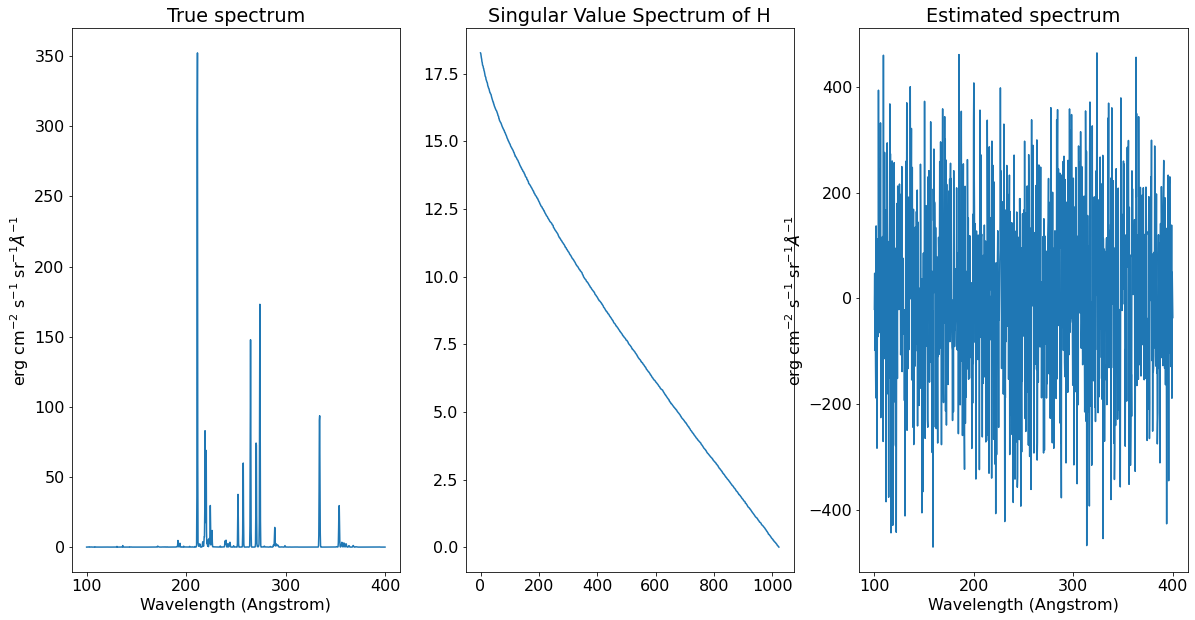

In [58]:
# Initializing our full rank, random matrix with additive Gaussian noise

# Noise Level = 1 ---------------------------------------------
R=1024
noiseLevel = 1
H=np.random.random((R,1024))-.5
u, lam, vh = np.linalg.svd(H)
fe=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

# Noise Level = 3 ---------------------------------------------
noiseLevel = 3
fe2=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

# Noise Level = 5 ---------------------------------------------
noiseLevel = 5
fe3=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

# Noise Level = 10 ---------------------------------------------
#noiseLevel = 10
#fe2=np.linalg.lstsq(H, np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024)))[0]

plt.subplot(1,3,1)
plt.plot(wvl,fe14.Spectrum['intensity'])
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('True spectrum')
plt.subplot(1,3,2)
plt.plot(lam)
plt.title('Singular Value Spectrum of H')
plt.subplot(1,3,3)
plt.plot(wvl,fe)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Estimated spectrum')


In [59]:
# Applying the four regression algorithms

# Ordinary Least Squares
OLS1=np.linalg.lstsq(H,fe)[0]
OLS2=np.linalg.lstsq(H,fe2)[0]
OLS3=np.linalg.lstsq(H,fe3)[0]

# 900 Element tSVD
reduceRank=900
Hr=np.matmul(np.matmul(np.transpose(vh[0:reduceRank,:]),np.diag(1./lam[0:reduceRank])),np.transpose(u[:,0:reduceRank]))
tSVD1=np.matmul(Hr, fe)
tSVD2=np.matmul(Hr, fe2)
tSVD3=np.matmul(Hr, fe3)

# Tikhonov
lpam=1
Tik1=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe)
Tik2=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe2)
Tik3=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe3)

# LASSO
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(H,fe)
LASSO1=model.coef_
model.fit(H,fe2)
LASSO2=model.coef_
model.fit(H,fe3)
LASSO3=model.coef_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning

Text(0.5, 1.0, 'LASSO (noiseLevel = 1)')

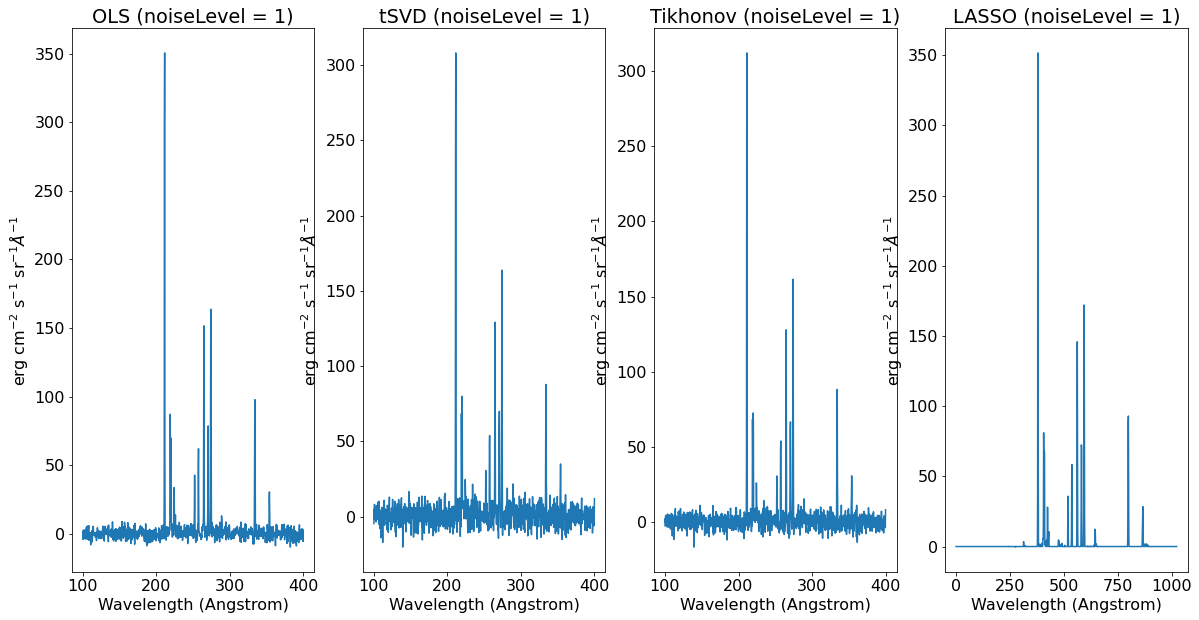

In [60]:
# Plotting the results
# Noise Level = 1
plt.subplot(1,4,1)
plt.plot(wvl,OLS1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 1)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 1)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 1)')
plt.subplot(1,4,4)
plt.plot(LASSO1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 1)')

Text(0.5, 1.0, 'LASSO (noiseLevel = 3)')

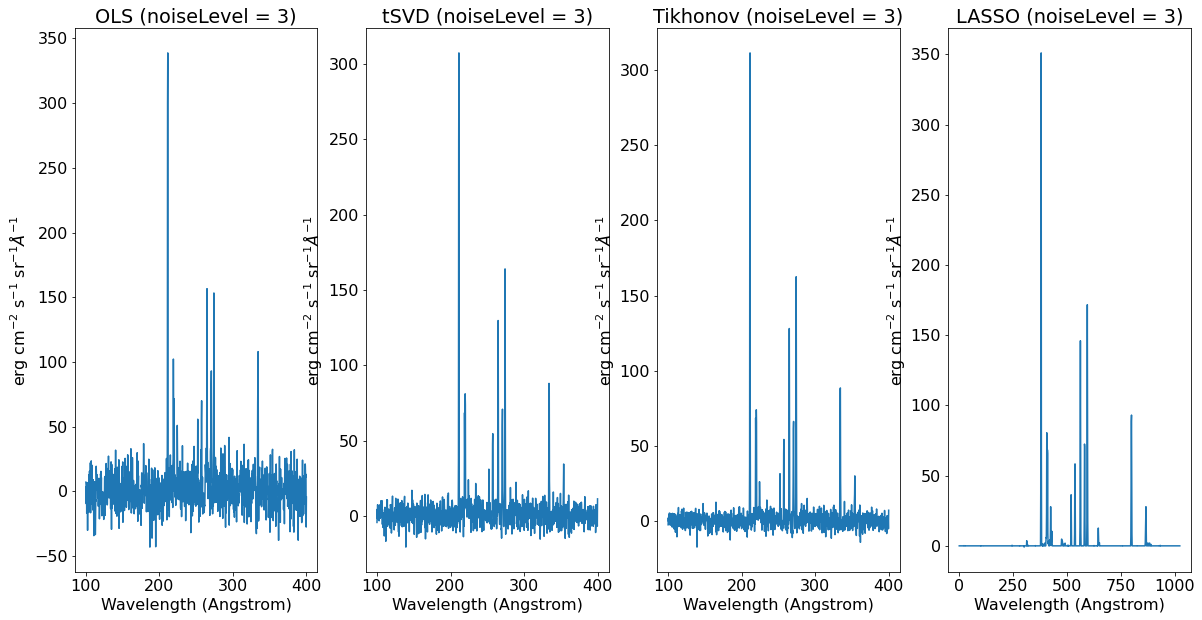

In [61]:
# Noise Level = 3
plt.subplot(1,4,1)
plt.plot(wvl,OLS2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 3)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 3)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 3)')
plt.subplot(1,4,4)
plt.plot(LASSO2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 3)')

Text(0.5, 1.0, 'LASSO (noiseLevel = 5)')

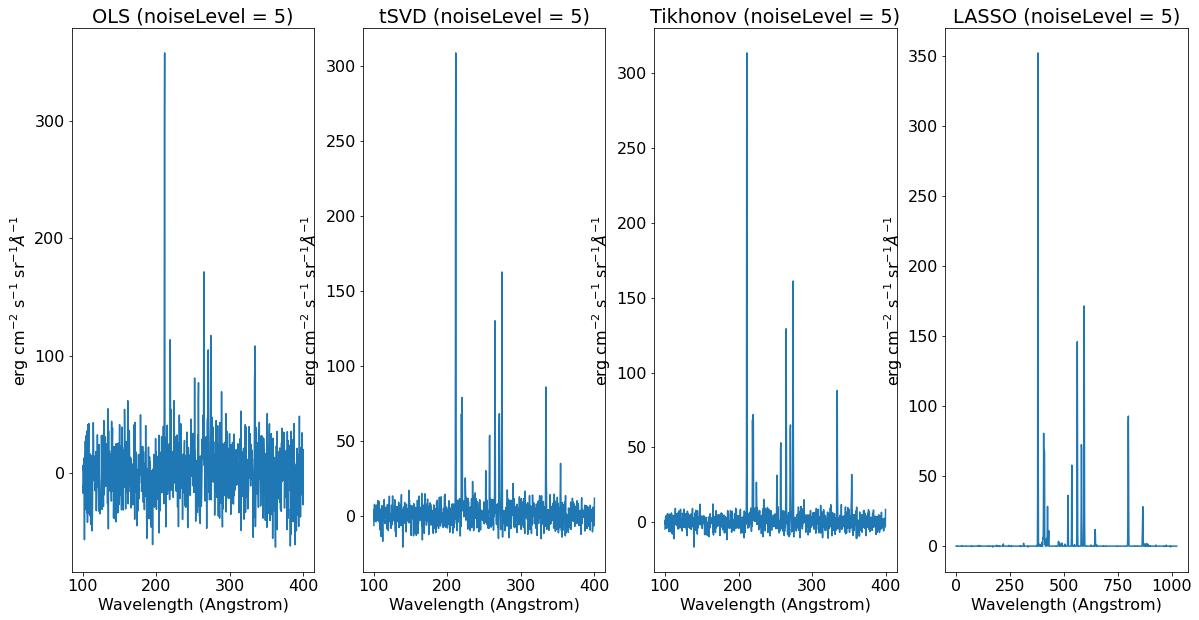

In [62]:
# Noise Level = 5
plt.subplot(1,4,1)
plt.plot(wvl,OLS3)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 5)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD3)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 5)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik3)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 5)')
plt.subplot(1,4,4)
plt.plot(LASSO3)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 5)')

### C) Hadamard Matrix
In this portion, we will apply the Hadamard matrix to the spectrum, and observe two levels of noise (noise level = 1 and = 10). We will then observe the ability of the four algorithms to recover the original spectrum. 

Text(0.5, 1.0, 'Estimated spectrum')

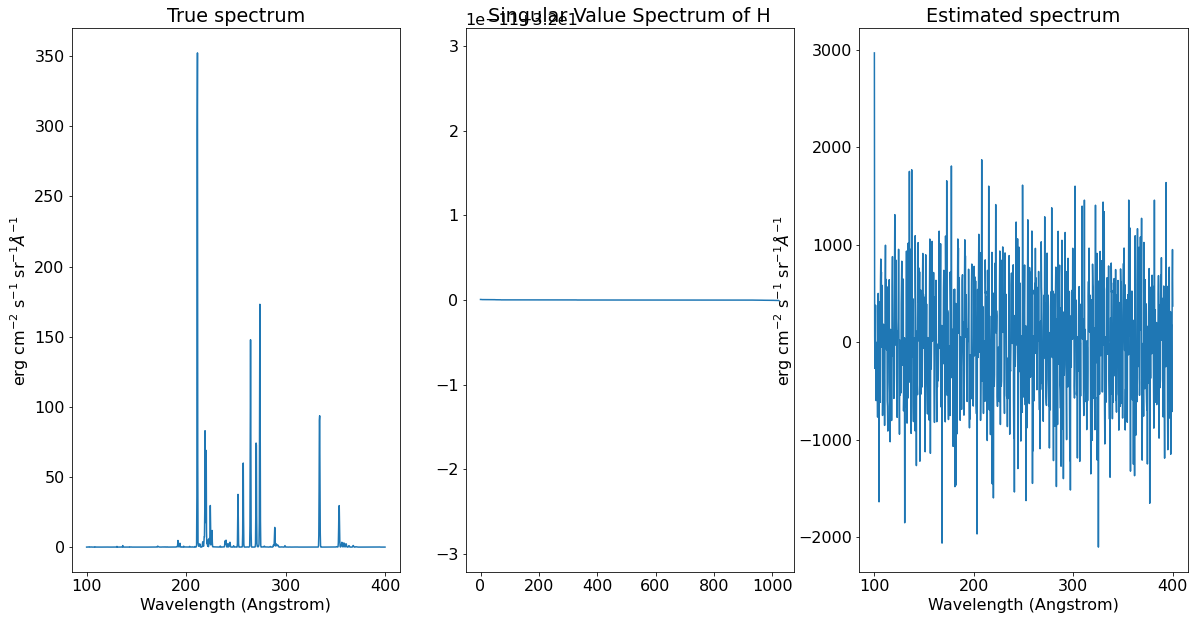

In [63]:
# First we apply the Hadamard matrix to the spectra
from scipy.linalg import hadamard
R=1024
noiseLevel = 1
H = hadamard(R)
u, lam, vh = np.linalg.svd(H)
fe=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

noiseLevel = 10
fe2=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

# Plotting initial spectra and H matrix
plt.subplot(1,3,1)
plt.plot(wvl,fe14.Spectrum['intensity'])
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('True spectrum')
plt.subplot(1,3,2)
plt.plot(lam)
plt.title('Singular Value Spectrum of H')
plt.subplot(1,3,3)
plt.plot(wvl,fe)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Estimated spectrum')

In [64]:
# Applying the four regression algorithms

# Ordinary Least Squares
OLS1=np.linalg.lstsq(H,fe)[0]
OLS2=np.linalg.lstsq(H,fe2)[0]
#OLS3=np.linalg.lstsq(H,fe3)[0]

# 900 Element tSVD
reduceRank=900
Hr=np.matmul(np.matmul(np.transpose(vh[0:reduceRank,:]),np.diag(1./lam[0:reduceRank])),np.transpose(u[:,0:reduceRank]))
tSVD1=np.matmul(Hr, fe)
tSVD2=np.matmul(Hr, fe2)
#tSVD3=np.matmul(Hr, fe3)

# Tikhonov
lpam=1
Tik1=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe)
Tik2=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe2)
#Tik3=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe3)

# LASSO
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(H,fe)
LASSO1=model.coef_
model.fit(H,fe2)
LASSO2=model.coef_
#model.fit(H,fe3)
#LASSO3=model.coef_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


Text(0.5, 1.0, 'LASSO (noiseLevel = 1)')

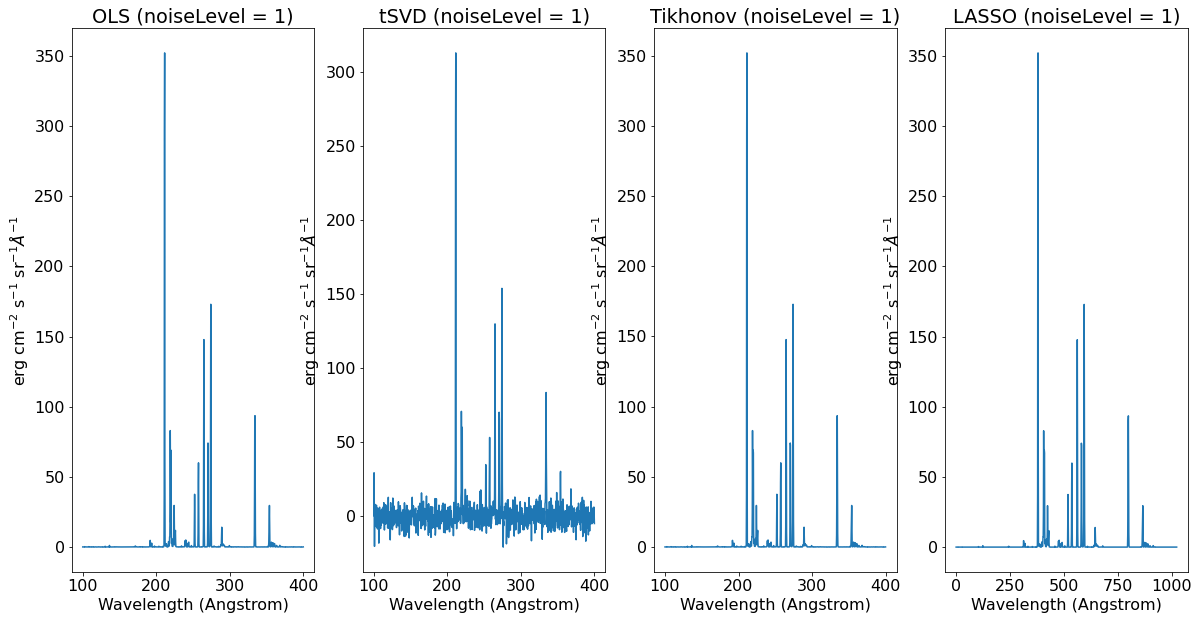

In [65]:
# Plotting the results
# Noise Level = 1
plt.subplot(1,4,1)
plt.plot(wvl,OLS1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 1)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 1)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 1)')
plt.subplot(1,4,4)
plt.plot(LASSO1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 1)')

Text(0.5, 1.0, 'LASSO (noiseLevel = 10)')

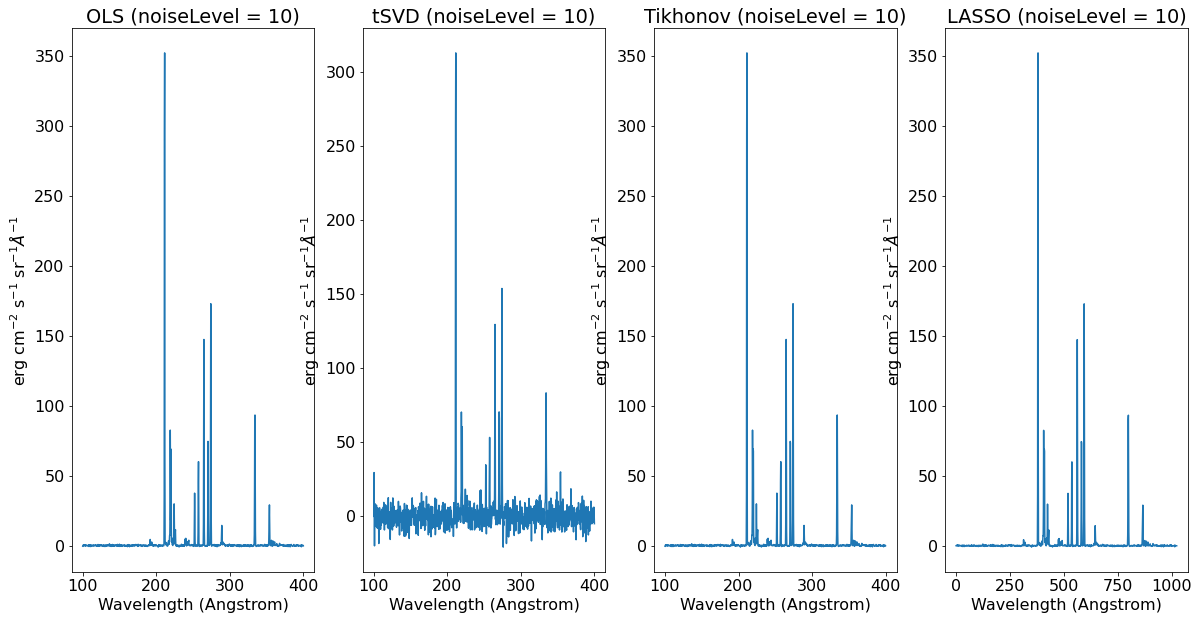

In [66]:
# Noise Level = 10
plt.subplot(1,4,1)
plt.plot(wvl,OLS2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 10)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 10)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 10)')
plt.subplot(1,4,4)
plt.plot(LASSO2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 10)')

### D) Downsampling Forward Model

Text(0.5, 1.0, 'Estimated spectrum')

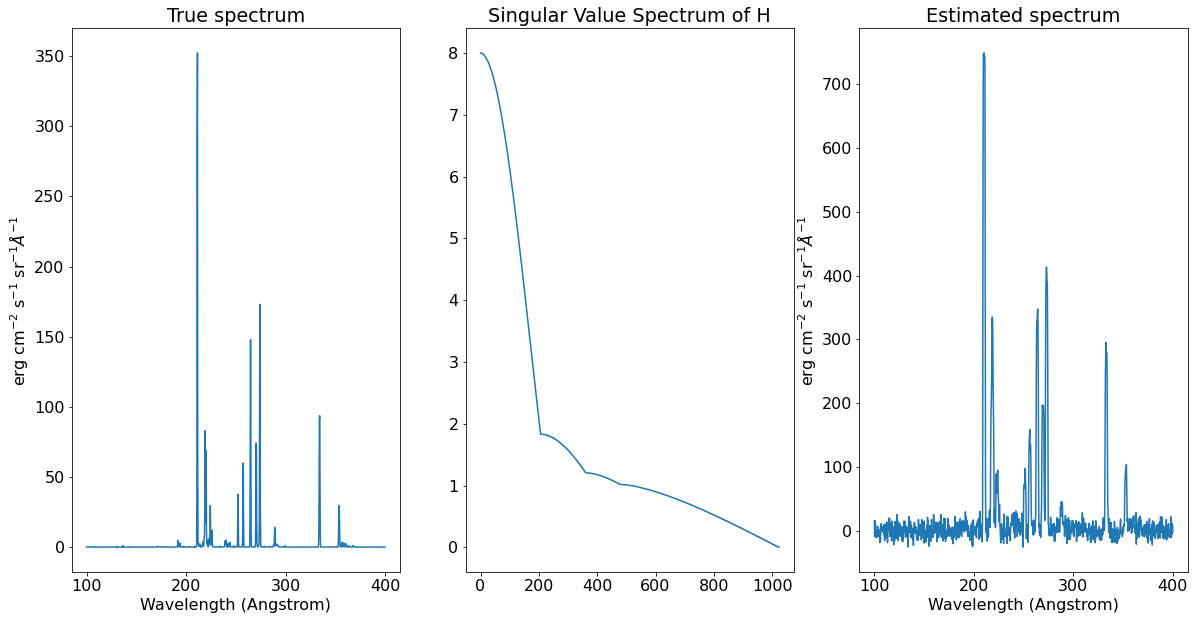

In [67]:
from scipy.linalg import toeplitz
psf=[1,1,1,1,1,1,1,1]
N=1024
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=1
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
noiseLevel = 10
fe=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

noiseLevel = 20
fe2=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

# Plotting initial spectra and H matrix
plt.subplot(1,3,1)
plt.plot(wvl,fe14.Spectrum['intensity'])
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('True spectrum')
plt.subplot(1,3,2)
plt.plot(s)
plt.title('Singular Value Spectrum of H')
plt.subplot(1,3,3)
plt.plot(wvl,fe)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Estimated spectrum')

In [68]:
# Applying the four regression algorithms

# Ordinary Least Squares
OLS1=np.linalg.lstsq(H,fe)[0]
OLS2=np.linalg.lstsq(H,fe2)[0]
#OLS3=np.linalg.lstsq(H,fe3)[0]

# 900 Element tSVD
reduceRank=900
Hr=np.matmul(np.matmul(np.transpose(vh[0:reduceRank,:]),np.diag(1./lam[0:reduceRank])),np.transpose(u[:,0:reduceRank]))
tSVD1=np.matmul(Hr, fe)
tSVD2=np.matmul(Hr, fe2)
#tSVD3=np.matmul(Hr, fe3)

# Tikhonov
lpam=1
Tik1=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe)
Tik2=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe2)
#Tik3=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe3)

# LASSO
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(H,fe)
LASSO1=model.coef_
model.fit(H,fe2)
LASSO2=model.coef_
#model.fit(H,fe3)
#LASSO3=model.coef_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


Text(0.5, 1.0, 'LASSO (noiseLevel = 10)')

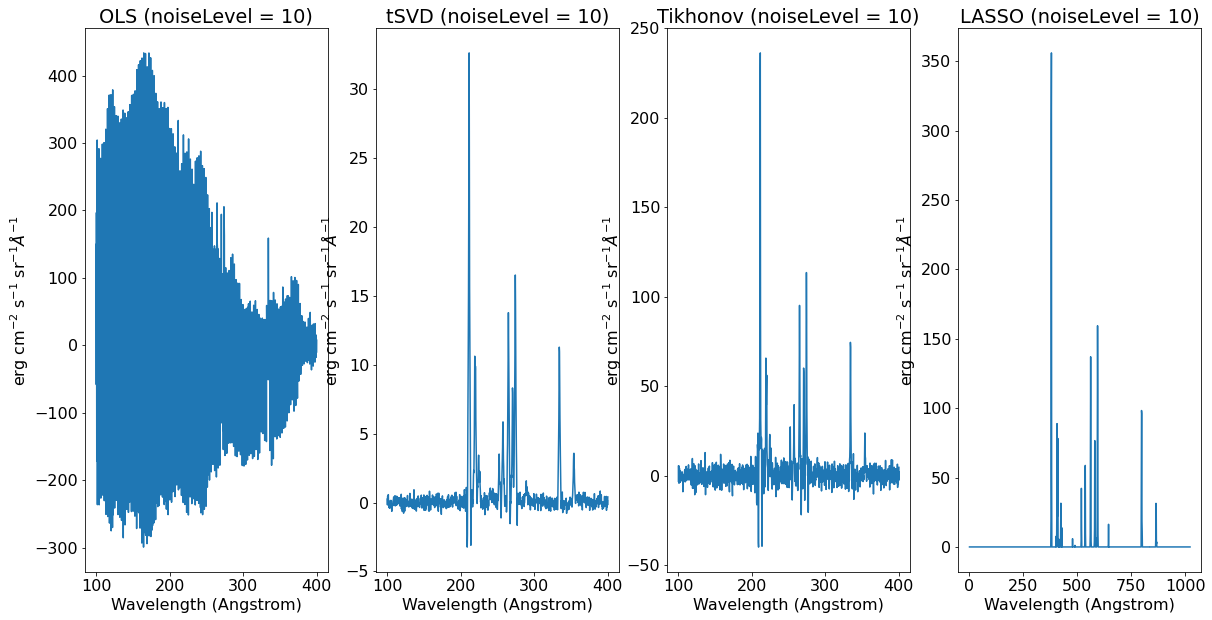

In [69]:
# Plotting the results
# Noise Level = 10
plt.subplot(1,4,1)
plt.plot(wvl,OLS1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 10)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 10)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 10)')
plt.subplot(1,4,4)
plt.plot(LASSO1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 10)')

Text(0.5, 1.0, 'LASSO (noiseLevel = 20)')

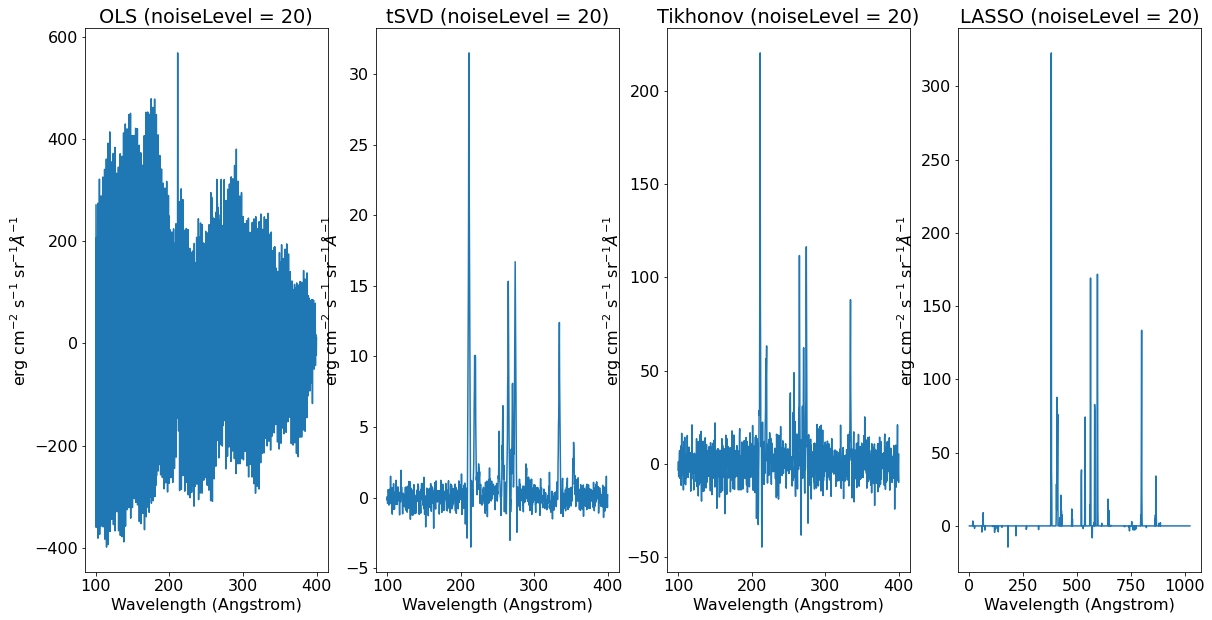

In [70]:
# Noise Level = 20
plt.subplot(1,4,1)
plt.plot(wvl,OLS2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 20)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 20)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 20)')
plt.subplot(1,4,4)
plt.plot(LASSO2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 20)')

### E) Discussion

As an initial observation, it can be said that using the Hadamard matrix is better than a random matrix for cases of OLS, Tikhonov, and LASSO, but tSVD looks to have performed about the same between the two H-matrices for the same noise level = 1. From closer inspection, it appears that tSVD performed at about the same level across all noise levels and H-matrices. Even with noise level = 10, utilizing the Hadamard matrix allowed for better recovery of the original signal across all regression algorithms, compared to the results from noise level = 5 with a random matrix. LASSO overall has no issues recovering the original spectrum when compared to the other three regression algorithms. OLS seems to struggle significantly with increasing levels of noise, and blows up significantly when utilizing a downsampling forward model. With a noise level = 10 using the downsampling forward model, tSVD and Tikhonov were able to obtain a relative reconstruction of the original signal, but still much worse off from the performance of LASSO. LASSO still performed extremely well utilizing the downsampling forward model with a noise level = 20, aside from a few errors. Overall, it seems that the Hadamard matrix and LASSO algorithm are the most desirable.